In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, impute, cluster
from nilearn import masking, plotting

import sys
sys.path.insert(1, "../")
import mvcomp


In [21]:
cc_mask = "../../data/CC_11_mask.nii.gz"
cc_t2 = "../../data/CC_T2_warped_mean_1001subjects.nii.gz"

In [7]:
d2 = np.load("../../data/d2_cc_1001_0p99.npy")
d2.shape

(2854, 1001)

In [15]:
imp = impute.SimpleImputer(strategy='mean')
pwr = preprocessing.PowerTransformer()
kmeans = cluster.KMeans(n_clusters=9)

In [16]:
d2_imp = imp.fit_transform(d2)
d2_pwr = pwr.fit_transform(d2_imp)
d2_kmeans = kmeans.fit_predict(d2_pwr)

/home/zklsmr/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


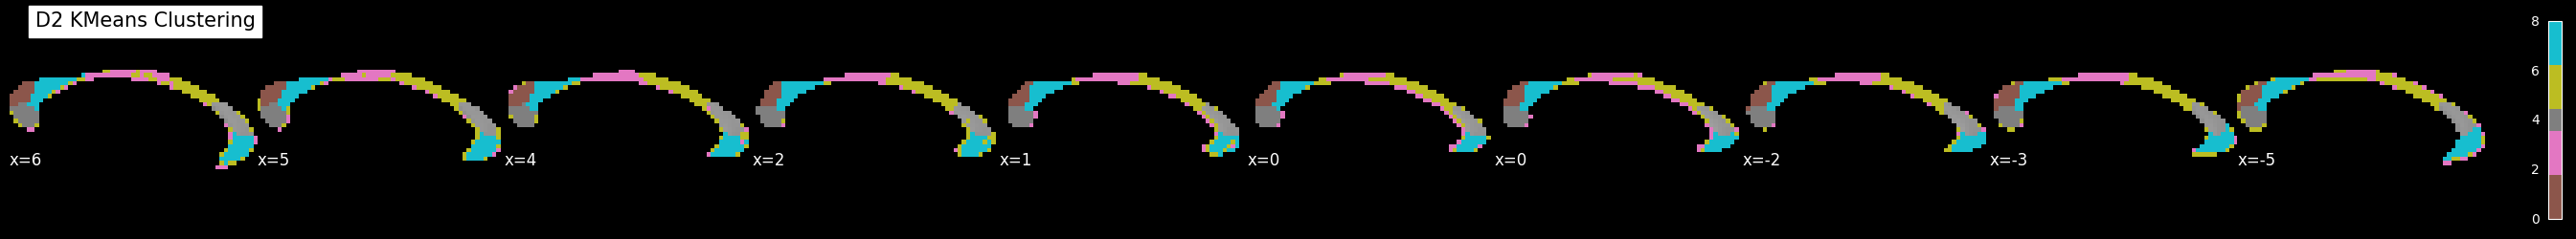

In [24]:
plotting.plot_stat_map(masking.unmask(d2_kmeans, cc_mask),bg_img=cc_t2, title="D2 KMeans Clustering",
                       cmap="tab10", display_mode="x", cut_coords=10)